In [2]:
import cv2
import numpy as np

In [3]:
image = cv2.imread("me.jpg")

In [6]:
cap = cv2.VideoCapture('qoumia.mp4')
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:

    # Display the resulting frame
    cv2.imshow('Frame',frame)

    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break

  # Break the loop
  else: 
    break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()

In [53]:
newimg=cv2.resize(image,(500,500))

In [68]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [40]:
cv2.imshow("Start",gray)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("grayed.jpg",gray)

True

In [15]:

# This will return video from the first webcam on your computer.
cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))

# loop runs if capturing has been initialized.
while(True):
	# reads frames from a camera
	# ret checks return at each frame
	ret, frame = cap.read()

	# Converts to HSV color space, OCV reads colors as BGR
	# frame is converted to hsv
	hsv = frame
	
	# output the frame
	out.write(hsv)
	
	# The original input frame is shown in the window
	cv2.imshow('Original', frame)

    # Wait for 'a' key to stop the program
	if cv2.waitKey(1) & 0xFF == ord('a'):
		break

# Close the window / Release webcam
cap.release()

# After we release our webcam, we also release the output
out.release()

# De-allocate any associated memory usage
cv2.destroyAllWindows()


In [27]:

#ffpyplayer for playing audio
from ffpyplayer.player import MediaPlayer
video_path="qoumia.mp4"
def PlayVideo(video_path):
    video=cv2.VideoCapture(video_path)
    player = MediaPlayer(video_path)
    while True:
        grabbed, frame=video.read()
        audio_frame, val = player.get_frame()
        if not grabbed:
            print("End of video")
            break
        if cv2.waitKey(28) & 0xFF == ord("q"):
            break
        cv2.imshow("Video", frame)
        if val != 'eof' and audio_frame is not None:
            #audio
            img, t = audio_frame
    video.release()
    cv2.destroyAllWindows()
PlayVideo(video_path)

End of video


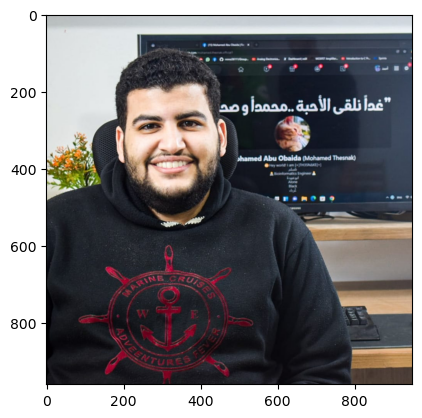

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("me.jpg")
plt.show(img)

In [70]:
gray = cv2.blur(gray,(4,4)) 
edged = cv2.Canny(gray, 30, 200)
cv2.waitKey(0)
  
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
cv2.imshow('Canny Edges After Contouring', edged)
cv2.waitKey(0)
  
print("Number of Contours found = " + str(len(contours)))
  
# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
  
cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Number of Contours found = 187


In [71]:


image = cv2.imread('me.jpg')

# Print error message if image is null
if image is None:
    print('Could not read image')

# Apply identity kernel
kernel1 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]])

identity = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)

cv2.imshow('Original', image)
cv2.imshow('Identity', identity)
    
cv2.waitKey()
cv2.imwrite('identity.jpg', identity)
cv2.destroyAllWindows()

# Apply blurring kernel
kernel2 = np.ones((5, 5), np.float32) / 25
img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel2)

cv2.imshow('Original', image)
cv2.imshow('Kernel Blur', img)
    
cv2.waitKey()
cv2.imwrite('blur_kernel.jpg', img)
cv2.destroyAllWindows()

In [10]:
import cv2 as cv
#read the image
img = cv.imread("me.jpg")
#convert the BGR image to HSV colour space
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
#obtain the grayscale image of the original image
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#set the bounds for the red hue
lower_red = np.array([160,100,50])
upper_red = np.array([180,255,255])

#create a mask using the bounds set
#mask = cv.inRange(hsv, lower_red, upper_red)
#create an inverse of the mask
#mask_inv = cv.bitwise_not(mask)
#Filter only the red colour from the original image using the mask(foreground)
#res = cv.bitwise_and(img, img, mask=mask)
#Filter the regions containing colours other than red from the grayscale image(background)
background = cv.bitwise_and(gray, gray, mask = mask_inv)
#convert the one channelled grayscale background to a three channelled image
background = np.stack((background,)*3, axis=-1)
#add the foreground and the background
added_img = cv.add(res, background)

#create resizable windows for the images
#cv.namedWindow("res", cv.WINDOW_NORMAL)
#cv.namedWindow("hsv", cv.WINDOW_NORMAL)
#cv.namedWindow("mask", cv.WINDOW_NORMAL)
cv.namedWindow("added", cv.WINDOW_NORMAL)
cv.namedWindow("back", cv.WINDOW_NORMAL)
#cv.namedWindow("mask_inv", cv.WINDOW_NORMAL)
cv.namedWindow("gray", cv.WINDOW_NORMAL)

#display the images
cv.imshow("back", background)
#cv.imshow("mask_inv", mask_inv)
cv.imshow("added",added_img)
#cv.imshow("mask", mask)
cv.imshow("gray", gray)
cv.imshow("hsv", hsv)
#cv.imshow("res", res)

if cv.waitKey(0):
    cv.destroyAllWindows()


In [12]:
l=['me.jpg','masjid-al-nabvi.jpg','grayed.jpg']
images=[]
for i in l:
    img=cv2.imread(i)
    img=cv2.resize(img,(500,500))
    images.append(img)
for image in images:
    cv.imshow("image ", image)
    cv2.waitKey()
    cv2.destroyAllWindows()

In [2]:
import pathlib
import cv2
cascade_path = "haarcascade_frontalface_default.xml"
#print(cascade_path)
clf = cv2.CascadeClassifier(str(cascade_path))
camera = cv2.VideoCapture(0)
while True:
    _,frame= camera.read()
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces =clf.detectMultiScale(
        gray,
        scaleFactor = 1.1,
        minNeighbors= 5,
        minSize=(30,30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    for(x,y,width,height) in faces:
        cv2.rectangle(frame,(x,y),(x+width,y+height),(255,255,0),2)
        
    cv2.imshow("Faces",frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()

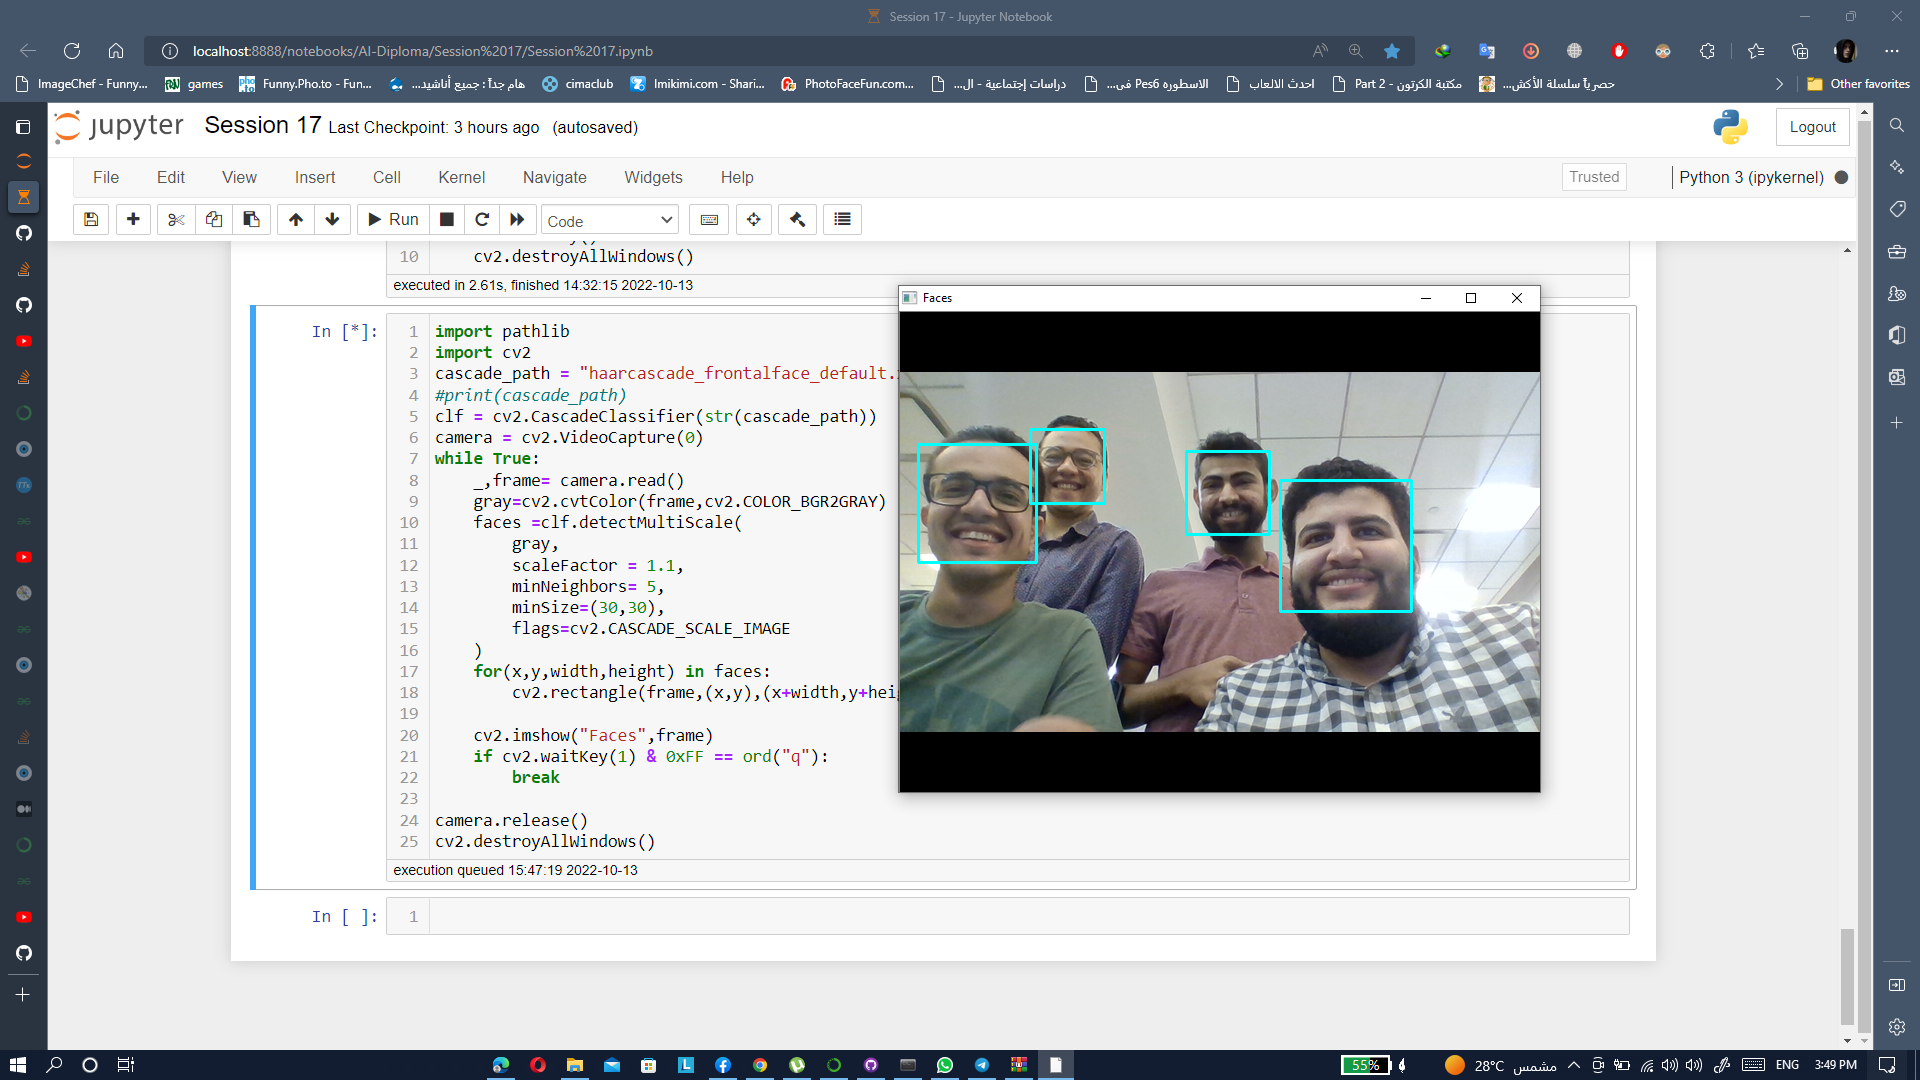